<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [3]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 40.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
from tensorflow.keras.datasets import reuters
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.layers import LSTM
import numpy as np
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [14]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [15]:
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [0]:
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [17]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 16s 3ms/step - loss: 2.6205 - acc: 0.3316 - val_loss: 2.3720 - val_acc: 0.3532
Epoch 2/10
6287/6287 [==============================] - 15s 2ms/step - loss: 2.1815 - acc: 0.4446 - val_loss: 2.0158 - val_acc: 0.4980
Epoch 3/10
6287/6287 [==============================] - 15s 2ms/step - loss: 1.6366 - acc: 0.5818 - val_loss: 1.8787 - val_acc: 0.5254
Epoch 4/10
6287/6287 [==============================] - 15s 2ms/step - loss: 1.0808 - acc: 0.7509 - val_loss: 1.9135 - val_acc: 0.5221
Epoch 5/10
6287/6287 [==============================] - 15s 2ms/step - loss: 0.6855 - acc: 0.8637 - val_loss: 2.0338 - val_acc: 0.5098
Epoch 6/10
6287/6287 [==============================] - 15s 2ms/step - loss: 0.4374 - acc: 0.9279 - val_loss: 2.0662 - val_acc: 0.5232
Epoch 7/10
6287/6287 [==============================] - 15s 2ms/step - loss: 0.3007 - acc: 0.9526 - val_loss: 2.3507 - val_acc: 0.4649
Epoch 8

In [24]:
score, acc = model.evaluate(input_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

2246/2246 [==============================] - 2s 925us/step
Test score: 2.4188835238731023
Test accuracy: 0.4959928762243989


Conclusion - RNN runs, and gives pretty decent improvement over a naive model. To *really* improve the model, more playing with parameters would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [0]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 9.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 4.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 5.PKLS4116.png

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'frog':
      return entry[2]
  return 0.0

In [0]:
import requests

image_urls = ["https://www.enchantedlearning.com/pgifs/Pondanimals.GIF",
              "https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg",
              "https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png",
              "https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg",
              "https://pklifescience.com/staticfiles/articles/images/PKLS4116.png"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

W0726 16:33:53.002509 140541270239104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0726 16:33:53.066713 140541270239104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



40960/35363 [==================================] - 0s 0us/step
[('n01443537', 'goldfish', 0.8495859), ('n01631663', 'eft', 0.067602046), ('n02536864', 'coho', 0.035163548)]
0.0


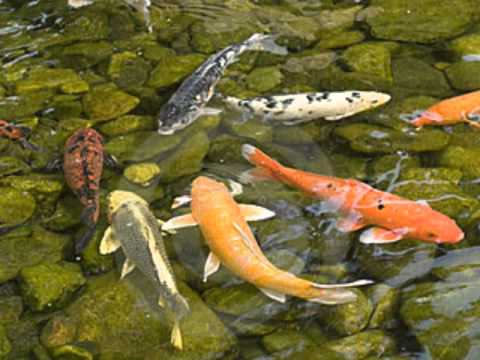

In [21]:
from IPython.display import Image

print(img_contains_frog(process_img_path('example1.jpg')))
Image(filename='example1.jpg', width=500)

[('n01443537', 'goldfish', 0.8495859), ('n01631663', 'eft', 0.067602046), ('n02536864', 'coho', 0.035163548)]
0.0


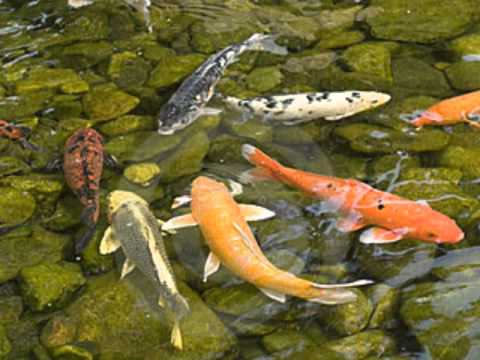

In [22]:
print(img_contains_frog(process_img_path('example1.jpg')))
Image(filename='example1.jpg', width=500)

In [23]:
print(img_contains_frog(process_img_path('example3.jpg')))
Image(filename='example3.jpg', width=500)

Output hidden; open in https://colab.research.google.com to view.

<a id="p3"></a>
## Part 3 - Generative Adverserial Networks (GANS)

Describe the difference between a discriminator and generator in a GAN in your own words.

__*Your Answer:*__ 

My way of differentiating and understanding the difference between discriminators and generators is simple. I remember that the Generator creates new data instances and the Discriminator evaluates them for authenticity. I think of it as a cat and mouse game or cop and robber game between the generator and the discriminator. 

One neural network, called the Generator, generates new data instances, while the other, the Discriminator, evaluates them for authenticity.
You can think of a GAN as a game of cat and mouse between a counterfeiter (Generator) and a cop (Discriminator). The counterfeiter is learning to create fake money, and the cop is learning to detect the fake money. Both of them are learning and improving. The counterfeiter is constantly learning to create better fakes, and the cop is constantly getting better at detecting them. The end result being that the counterfeiter (Generator) is now trained to create ultra-realistic money!

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

**1 - What do you consider your strongest area, as a Data Scientist?** 
          At this current moment, I believe my strongest area of being a Data Scientist is being able to apply the necessary missing data points when NaNs and Nulls are encountered. Similarily, my strongest area is also ML, I didn't know anything about ML, but my interest exponentially spiked once I learned about it. Thus my passion led me to find books and read off course about it.  
**2 - What area of Data Science would you most like to learn more about, and why?**
         My curiousity regarding Random Tree Forests, XGKBoost, ML, Spark and NNs are above the rest. I find these are what most employers want and I am also fascinated by what possiblities are held by these technologies. I've started to dive deeper into them by reading books on the topic.
**3 - Where do you think Data Science will be in 5 years?**
        'Data Science' will be a form of ML, AI, Vision Learning, NN...it shall be a gateway towards other occupations that require the same technical skills but with additionally specific skillset. DS will move towards bringing Big Data to what Excel made for personal spreadsheets. Easy to use. 
**4 - What are the threats posed by AI to our society?**
        The threat of AI is unknown but one can dream what the problems they could bring forth. AI could bring forth more efficient warefare, obsoletion of millions of jobs across the world and climate change. Our society must adapt to the inevitable threat of AI. Governments must be properly educated prior to making any decisions.
**5 - How do you think we can counteract those threats?**
        I do not believe such threats can be prevented. I believe the weaponization of AI can be counteracted the same way governments do with nuclear weapons. We know you have one, and you know I have one, so I'll be hesitant in using it because it'll end the world. 
**6 - Do you think achieving General Artifical Intelligence is ever possible?**
        I do not believe achieving pure AGI is possible, you're trying to replicate how the human brain works in its entirety, but we do not even know much about the brain by itself. We assume to know how the brain works in terms of where dreams are stored or what memories are. It's all too new to get excited about. The concept of flying cars in the 1970s was also an exciting idea people would discuss but we are now just switching from gasoline to electric. It's going to take time. 

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")